# <center><font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font></center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###

## <b><font color='red'>     NOTE: This IPython notebook should be read alonside the corresponding chapter in the book, where each piece of code is fully explained.     </font></b> <br>

# <center>Chapter 6. SciPy for Data Mining</center>

> * [Image processing: scipy.ndimage](https://scipy-lectures.github.io/intro/scipy.html#image-processing-scipy-ndimage)<br>
> * [Measurements: scipy.ndimage.measurements](http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html#module-scipy.ndimage.measurements)

>[Statistical functions: scipy.stats](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

>[Spatial algorithms and data structures: scipy.spatial](http://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.html)

> * [Clustering package: scipy.cluster](http://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.html)<br>
> * [K-means clustering and vector quantization: scipy.cluster.vq](http://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.vq.html)<br>
> * [Hierarchical clustering: scipy.cluster.hierarchy](http://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.hierarchy.html)

##Summary##

This chapter deal with tools appropriate for data mining, and explores the modules such as *stats* (for statistics), *spatial* (for data structures), and 
*cluster* (for clustering and vector quantization)

In [1]:
%matplotlib inline

##Descriptive statistics##

>[Statistical functions: scipy.stats](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

###Distributions###

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [2]:
import scipy.misc 
from scipy.stats import signaltonoise 
from scipy.stats import norm     # Gaussian distribution
lena=scipy.misc.lena().astype(float)
lena+= norm.rvs(loc=0,scale=16,size=lena.shape)

In [3]:
signaltonoise(lena,axis=None)


array(2.45768296017567)

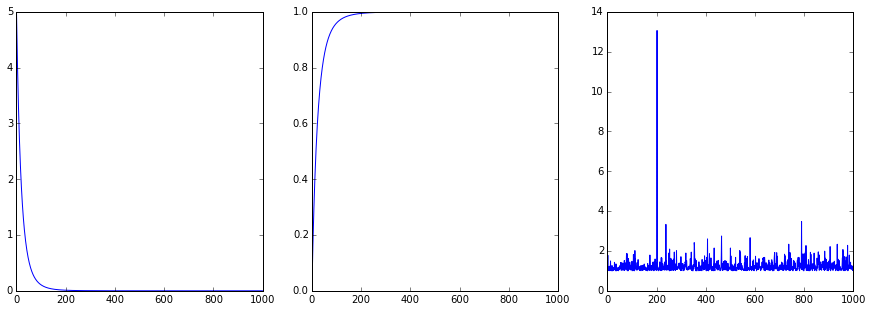

In [4]:
import numpy
from scipy.stats import pareto
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 5.0)
x=numpy.linspace(1,10,1000)
plt.subplot(131); plt.plot(pareto.pdf(x,5))
plt.subplot(132); plt.plot(pareto.cdf(x,5))
plt.subplot(133); plt.plot(pareto.rvs(5,size=1000))
plt.show()

###Interval estimation, correlation measures, and statistical tests###

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [5]:
import numpy
data = numpy.array([[113,105,130,101,138,118,87,116,75,96, \
             122,103,116,107,118,103,111,104,111,89,78,100,89,85,88], \
         [137,105,133,108,115,170,103,145,78,107, \
              84,148,147,87,166,146,123,135,112,93,76,116,78,101,123]])

In [6]:
dataDiff = data[1,:]-data[0,:]
dataDiff.mean(), dataDiff.std()

(13.32, 22.472596645692729)

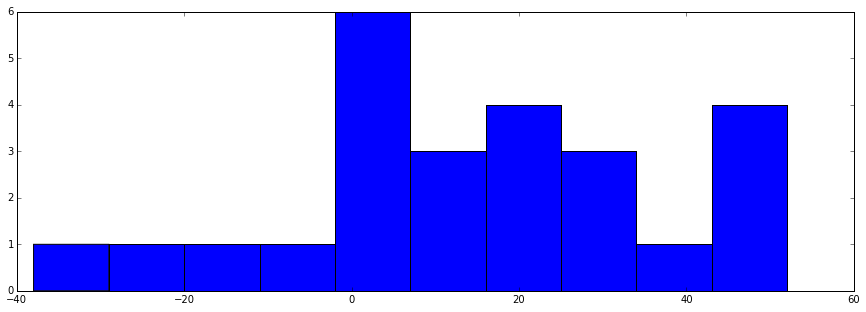

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.hist(dataDiff)
plt.show()

In [8]:
from scipy.stats import ttest_1samp
t_stat,p_value=ttest_1samp(dataDiff,0.0)

In [9]:
print (p_value/2.0)

0.00389575522747


###Distribution fitting###

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [10]:
from scipy.stats import norm     # Gaussian distribution
mean,std=norm.fit(dataDiff)

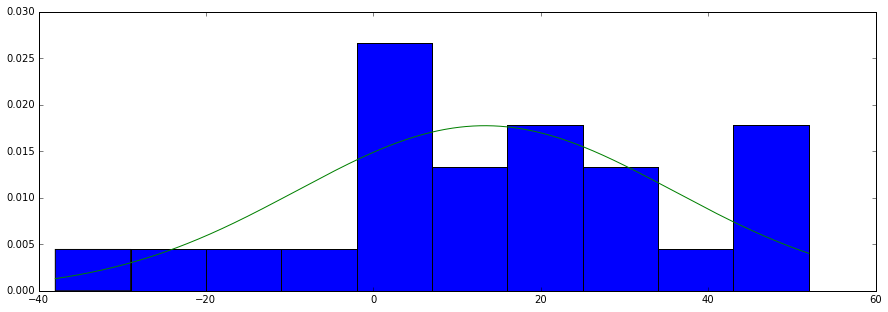

In [11]:
plt.hist(dataDiff, normed=1)
x=numpy.linspace(dataDiff.min(),dataDiff.max(),1000)
pdf=norm.pdf(x,mean,std)
plt.plot(x,pdf)

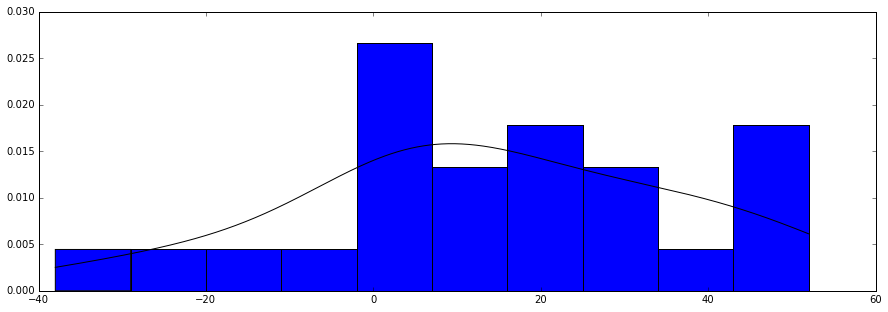

In [12]:
from scipy.stats import gaussian_kde 
pdf = gaussian_kde(dataDiff) 
pdf = pdf.evaluate(x) 
plt.hist(dataDiff, normed=1)  
plt.plot(x,pdf,'k') 
plt.savefig("hist2.png") 
plt.show() 

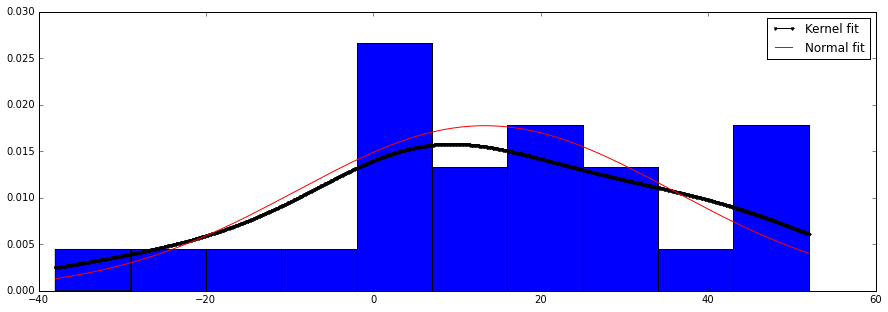

In [13]:
plt.hist(dataDiff, normed=1)  
plt.plot(x,pdf,'k.-',label='Kernel fit') 
plt.plot(x,norm.pdf(x,mean,std),'r',label='Normal fit') 
plt.legend() 
plt.savefig("hist3.png") 
plt.show() 

###Distances###

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [14]:
import numpy 
from scipy.spatial.distance import minkowski 
Square=numpy.mgrid[-1.1:1.1:512j,-1.1:1.1:512j]
X=Square[0]; Y=Square[1]
f=lambda x,y,p: minkowski([x,y],[0.0,0.0],p)<=1.0
Ball=lambda p:numpy.vectorize(f)(X,Y,p)

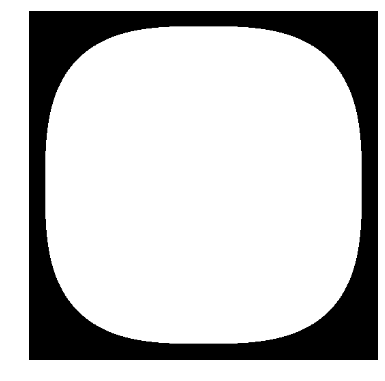

In [15]:
import matplotlib.pylab as plt 
plt.imshow(Ball(3), cmap = plt.cm.gray)
plt.axis('off') 
plt.subplots_adjust(left=0.0127,bottom=0.0164,right=0.987,top=0.984)
plt.show() # IT WILL TAKE SOME TIME FOR THE PLOT TO SHOW UP

####The output from next commands might be different from the ones shown in the book as the main matrix elements are obtained <font color=red>randomly</font>####

In [16]:
import scipy.stats
from scipy.spatial.distance import pdist
V=scipy.stats.randint.rvs(0.4,3,size=(5,4))-1
print (V)

[[ 0 -1  0 -1]
 [ 1 -1  0  0]
 [-1  1  0 -1]
 [ 1  1  0  0]
 [-1 -1  1  1]]


In [17]:
pdist(V,metric='cityblock')

array([ 2.,  3.,  4.,  4.,  5.,  2.,  4.,  3.,  5.,  6.])

In [18]:
from scipy.spatial.distance import cdist
V=scipy.stats.randint.rvs(0.4, 2, size=(3,4)).astype(bool)
W=scipy.stats.randint.rvs(0.4, 3, size=(2,4)).astype(bool)
cdist(V,W,'jaccard')

array([[ 0.5       ,  0.66666667],
       [ 0.66666667,  0.33333333],
       [ 0.5       ,  0.25      ]])

In [19]:
from scipy.spatial import KDTree
data=scipy.stats.randint.rvs(0.4,10,size=(10,4))
print (data)

[[1 1 6 3]
 [7 9 5 9]
 [8 3 9 0]
 [5 4 7 8]
 [7 3 6 1]
 [9 6 1 8]
 [6 3 4 0]
 [2 0 8 4]
 [1 1 2 7]
 [5 7 6 2]]


In [20]:
tree=KDTree(data)
tree.query([0,0,0,0])

(6.8556546004010439, 0)

#Clustering#

> * [Clustering package: scipy.cluster](http://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.html)<br>

##Vector quantization and k-means##

> * [K-means clustering and vector quantization: scipy.cluster.vq](http://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.vq.html)<br>

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [21]:
import numpy
from scipy.stats import norm
from numpy import array,vstack
data=norm.rvs(0,0.3,size=(10000,2))
inside_ball=numpy.hypot(data[:,0],data[:,1])<1.0
data=data[inside_ball]
data = vstack((data, data+array([1,1]),data+array([-1,1])))

In [22]:
from scipy.cluster.vq import *
centroids, distortion = kmeans(data,3)
cluster_assignment, distances = vq(data,centroids)

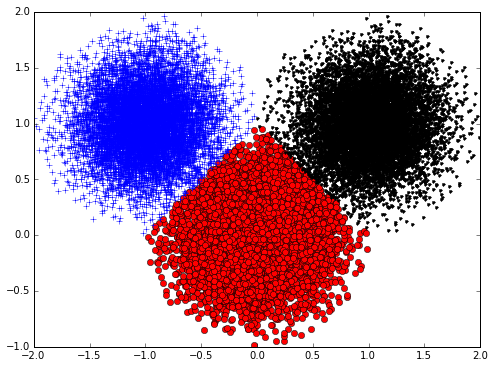

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(data[cluster_assignment==0,0], data[cluster_assignment==0,1], 'ro')
plt.plot(data[cluster_assignment==1,0], data[cluster_assignment==1,1], 'b+')
plt.plot(data[cluster_assignment==2,0], data[cluster_assignment==2,1], 'k.')
plt.show()

##Hierarchical clustering##

> * [Hierarchical clustering: scipy.cluster.hierarchy](http://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.hierarchy.html)

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [24]:
import numpy
file=open("dentitio.dat","r")    # open the file
lines=file.readlines()      # read each line in memory
file.close()        # close the file
mammals=[]                 # this stores the names
dataset=numpy.zeros((len(lines),8))  # this stores the data
for index,line in enumerate(lines):
    mammals.append( line[0:27].rstrip(" ").capitalize() )
    for tooth in range(8):
        dataset[index,tooth]=int(line[27+tooth])

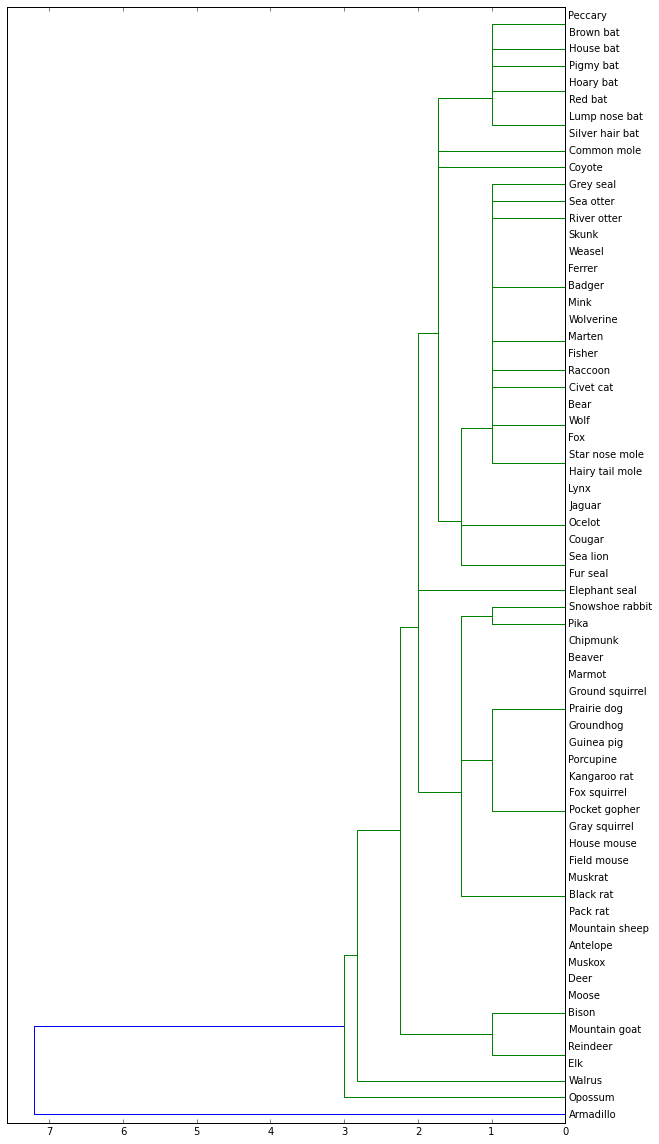

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 20.0)
from scipy.cluster.hierarchy import linkage, dendrogram
Z=linkage(dataset)
dendrogram(Z, labels=mammals, orientation="right")
plt.show()

##  <center> This is the end of the working codes shown and thoroughly discussed in Chapter 6 of the book  <font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font>
</center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###
